In [52]:
import numpy as np
import matplotlib.pyplot as plt
import math
from linreg import linreg

In [53]:
background = (0 + (-.04)) / 2 # background radiation level

radiation_lvl_mV = np.array([[.28,.63,.79],[.82,1,1.08],[1.58,1.66,1.71],[2.47,2.52,2.55],[3.53,3.54,3.56],[4.74,4.73,4.72],
                    [6.07,6.02,5.98],[6.92,6.9,6.69],[7.6,7.49,7.42],[8.98,8.98,8.93]])

# radiation_lvl_mV_err = np.sqrt(0.005**2 + np.std(radiation_lvl_mV, axis = 1)**2) 

radiation_lvl_mV_avg = np.mean(radiation_lvl_mV, axis=1) - background
radiation_lvl_mV_avg_err = np.std(radiation_lvl_mV, axis = 1) / (3 ** 0.5)

filament_voltage_mV = np.array([2.00,3.00,4.00,5.00,6.00,7.00,8.00,8.50,9.00,10.00]) # THESE VALUES SHOULD BE UPDATED WITH MORE PRECISE ONES SENT BY ALEX
filament_current = np.array([.81,.98,1.12,1.25,1.37,1.48,1.59,1.64,1.69,1.79]) # units of amperes
current_err = .005 # amperes
volt_err = .005 # mV

R_ref = 1.03 # units of ohm's

resistance = filament_voltage_mV / filament_current # units of milliohm's
resistance_err = ((volt_err**2 + (resistance*current_err)**2)**0.5) / filament_current # error in resistance

relative_resistance = resistance / R_ref
relative_resistance_err = ((((1 / R_ref)**2) * resistance_err**2) + ((-1/(resistance**2))**2) * .005)**0.5
# USE TABLE IN LAB MANUAL TO DETERMINE FILAMENT TEMPERATURE

### Establishing linear relationship for table in lab manual

m = 0.005744212925280807 +/- 3.60873287381907e-10
b = -1.1618199576753994 +/- 7.19826882438027e-07
chi-squared = 651189711867.1649
reduced chi-squared = 108531618644.52748


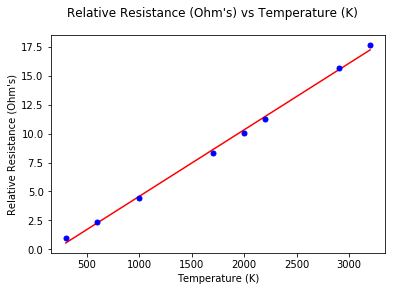

In [54]:
x = np.array([300,600,1000,1700,2000,2200,2900,3200]) # units of kelvin
y = np.array([1,2.34,4.41,8.28,10.03,11.24,15.63,17.62]) # unitless. random values chosen from the table in manual
err_y = np.ones(len(y)) * .000001

coeff = linreg(x, y, err_y, len(x) - 2, 'Temperature (K)', 'Relative Resistance (Ohm\'s)', "Relative Resistance (Ohm\'s) vs Temperature (K)")
plt.savefig('fig_4.png')

In [55]:
def resistance_to_temperature(relative_resistivity, m = coeff[0], b = coeff[2]):
    '''takes the relative_resistance, slope, and y-intercept, and returns the filament temperature, 
    in Kelvin, corresponding to the given relative resistivity'''
    return (relative_resistivity - b) / m

In [56]:
filament_temp_K = resistance_to_temperature(relative_resistance)
filament_temp_K_err = (1 / relative_resistance) * relative_resistance_err

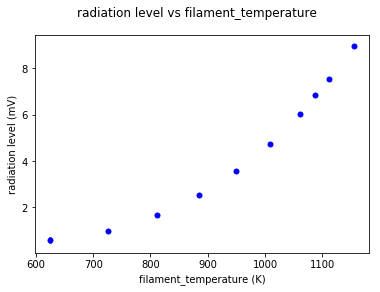

In [57]:
x = filament_temp_K
y = radiation_lvl_mV_avg
err_y = radiation_lvl_mV_avg_err # NEED TO INCLUDE ERROR IN FILAMENT TEMPERATURE (x)

plt.errorbar(x, y, yerr = err_y, fmt = "bo", markersize = "5", linewidth=3)
plt.xlabel('filament_temperature (K)')
plt.ylabel('radiation level (mV)')
plt.suptitle("radiation level vs filament_temperature")
plt.savefig('fig_5.png')

### Fitting line to log log data

m = 4.729426061677399 +/- 0.03856036019265958
b = -31.155757930295916 +/- 0.2671420529983815
chi-squared = 1.5828514094694028
reduced chi-squared = 0.19785642618367535


array([0.58666667, 0.98666667, 1.67      , 2.53333333, 3.56333333,
       4.75      , 6.04333333, 6.85666667, 7.52333333, 8.98333333])

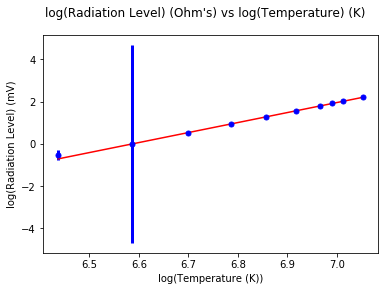

In [58]:
x = np.log(filament_temp_K)
y = np.log(radiation_lvl_mV_avg)
err_y = radiation_lvl_mV_avg_err / y # NEED TO INCLUDE ERROR IN FILAMENT TEMPERATURE (x)

linreg(x, y, err_y, len(x) - 2, 'log(Temperature (K))', 'log(Radiation Level) (mV)', "log(Radiation Level) (Ohm\'s) vs log(Temperature) (K)")
plt.savefig('fig_6.png')
radiation_lvl_mV_avg

# Log-Log Regression without outlier

m = 4.729425875325279 +/- 0.038560512716082955
b = -31.155756637277413 +/- 0.2671431129347502
chi-squared = 1.5828484567565106
reduced chi-squared = 0.22612120810807296


array([  4.7294,   0.0386, -31.1558,   0.2671,   1.5828,   0.2261])

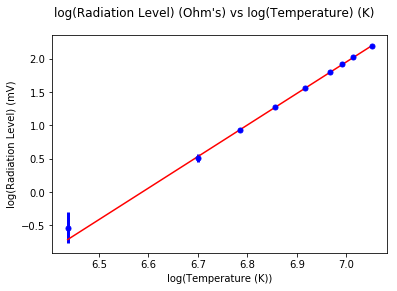

In [59]:
x = np.log(np.delete(filament_temp_K,1))
y = np.log(np.delete(radiation_lvl_mV_avg,1))
err_y = np.delete(radiation_lvl_mV_avg_err,1) / y # NEED TO INCLUDE ERROR IN FILAMENT TEMPERATURE (x)

coeff = linreg(x, y, err_y, len(x) - 2, 'log(Temperature (K))', 'log(Radiation Level) (mV)', "log(Radiation Level) (Ohm\'s) vs log(Temperature) (K)")
plt.savefig('fig_7.png')
coeff

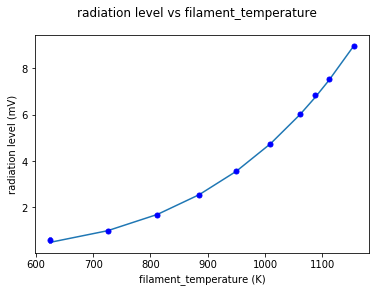

In [60]:
x = filament_temp_K
y = radiation_lvl_mV_avg
err_y = radiation_lvl_mV_avg_err # NEED TO INCLUDE ERROR IN FILAMENT TEMPERATURE (x)

plt.errorbar(x, y, yerr = err_y, fmt = "bo", markersize = "5", linewidth=3)
plt.plot(x, np.e**coeff[2] * x**coeff[0])
plt.xlabel('filament_temperature (K)')
plt.ylabel('radiation level (mV)')
plt.suptitle("radiation level vs filament_temperature")
plt.savefig('fig_8.png')